<a href="https://colab.research.google.com/github/anoop2004/housing-linear-regression/blob/main/timeseriesproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [448]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [449]:
import matplotlib.pyplot as plt
%matplotlib inline

In [450]:

df=pd.read_csv("/content/crime (1).csv")

In [451]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,andhra pradesh,adilabad,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,andhra pradesh,anantapur,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,andhra pradesh,chittoor,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,andhra pradesh,cuddapah,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,andhra pradesh,cyberabad,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [452]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [454]:
df['TOTAL IPC CRIMES']=df['TOTAL IPC CRIMES']+df['OTHER IPC CRIMES']

object


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
    print(i)
    print(df[i].unique())

In [456]:
df.drop(columns=['STATE/UT','MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES','DISTRICT'], inplace=True)



In [458]:
df=df.groupby('YEAR')['TOTAL IPC CRIMES'].sum()



In [459]:
df

YEAR
2001    3538616
2002    3560660
2003    3432240
2004    3664020
2005    3645204
2006    3756586
2007    3979346
2008    4186758
2009    4242690
2010    4449662
2011    4651150
2012    4774376
2013    5295444
Name: TOTAL IPC CRIMES, dtype: int64

In [460]:
df=pd.DataFrame(df)

In [462]:
df['year']=[x for x in range(2001,2014)]

In [463]:
df.head()

,TOTAL IPC CRIMES,year
YEAR,,
2001,3538616,2001
2002,3560660,2002
2003,3432240,2003
2004,3664020,2004
2005,3645204,2005
2006,3756586,2006
2007,3979346,2007
2008,4186758,2008
2009,4242690,2009


In [464]:
df['year'] = pd.to_datetime(df['year'], format='%Y')


In [465]:
df.set_index('year', inplace=True)


In [466]:
df.head(1)

,TOTAL IPC CRIMES
year,
2001-01-01,3538616
2002-01-01,3560660
2003-01-01,3432240
2004-01-01,3664020
2005-01-01,3645204


In [467]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TOTAL IPC CRIMES,13.0,4.090519e+06,571399.573913,3432240.0,3645204.0,3979346.0,4449662.0,5295444.0


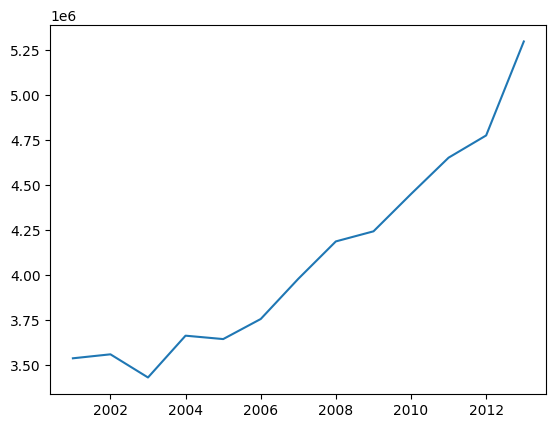

In [468]:
plt.plot(df['TOTAL IPC CRIMES'])


In [469]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


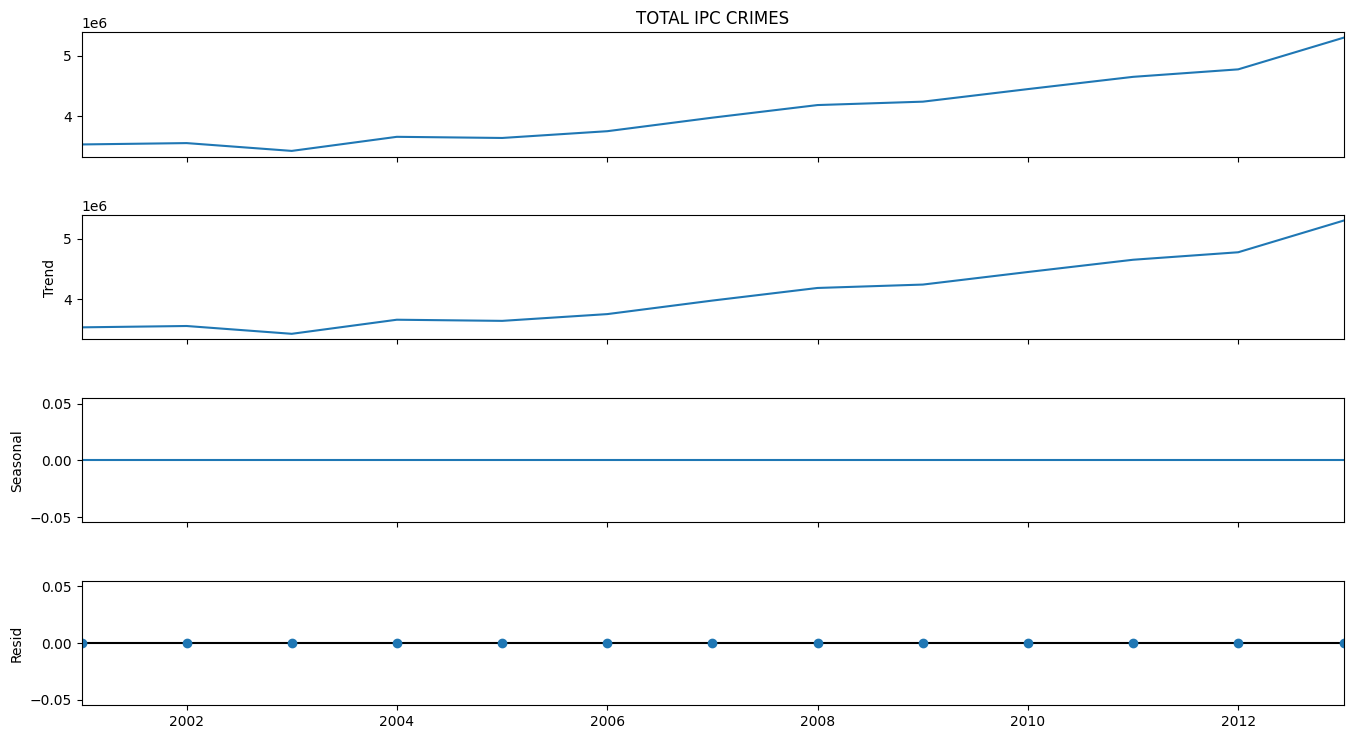

In [470]:
d=seasonal_decompose(df['TOTAL IPC CRIMES'])
f=d.plot()
f.set_size_inches(15,8)
from statsmodels.tsa.seasonal import seasonal_decompose

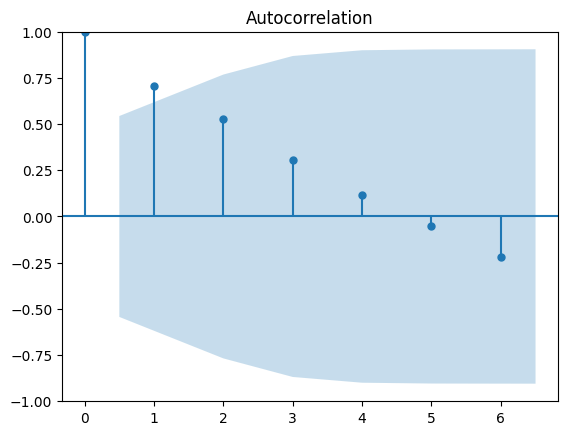

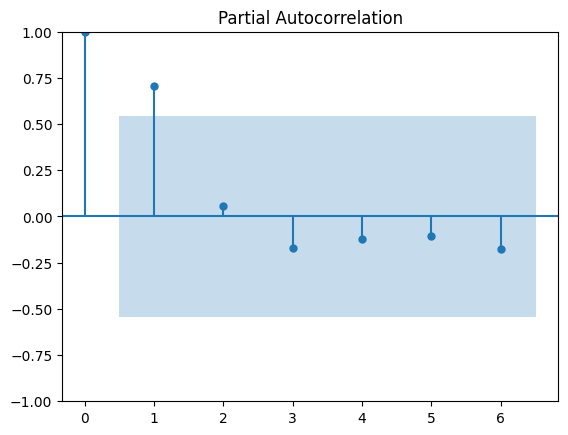

In [471]:

plot_acf(df['TOTAL IPC CRIMES'], title='Autocorrelation')
plt.show()

plot_pacf(df['TOTAL IPC CRIMES'], title='Partial Autocorrelation')
plt.show()

In [472]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['TOTAL IPC CRIMES'])

(2.2182534277979364,
 0.9988971912058884,
 0,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 213.2175182610083)

In [473]:
def adfcheck(ts):
  result=adfuller(ts)
  print("test is ")
  labels=['ADF TEST STATISTICS', 'p_value','#lags used', 'number of obseravtions used']
  for v,l in zip(result, labels):
    print(l+' : '+str(v))
  if result[1]<0.05 :
    print(" strong evience againt null hypotheses, rejectnull hypotheses, data has no unit root and it is stationary")
  else:
    print(" weak evidence againt null hypotheses, time series has unit root, indicating non stational ")


In [474]:
adfcheck(df['TOTAL IPC CRIMES'])

test is 
ADF TEST STATISTICS : 2.2182534277979364
p_value : 0.9988971912058884
#lags used : 0
number of obseravtions used : 12
 weak evidence againt null hypotheses, time series has unit root, indicating non stational 


In [475]:
#NO SEASONALITY ABD STATIONAY IS AT 9
trend_seasonality_removed=df['TOTAL IPC CRIMES'].shift(9) #MAKES NO SENSE (LINEAR PREDICTION)
trend_seasonality_removed=trend_seasonality_removed.dropna()

trend_seasonality_removeddf=pd.DataFrame(trend_seasonality_removed)
adfuller(trend_seasonality_removeddf['TOTAL IPC CRIMES'])
adfcheck(trend_seasonality_removeddf['TOTAL IPC CRIMES'])

test is 
ADF TEST STATISTICS : -3.646226865323693
p_value : 0.0049363414518457825
#lags used : 0
number of obseravtions used : 3
 strong evience againt null hypotheses, rejectnull hypotheses, data has no unit root and it is stationary


**TIME SERIE MODEL GENERATION**

In [476]:
model = sm.tsa.ARIMA(df['TOTAL IPC CRIMES'], order=(1,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:       TOTAL IPC CRIMES   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -167.382
Date:                Sat, 02 Mar 2024   AIC                            340.764
Time:                        19:47:19   BIC                            342.219
Sample:                    01-01-2001   HQIC                           340.226
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7077      0.243     -2.917      0.004      -1.183      -0.232
ma.L1          0.7513      0.225      3.336      0.001       0.310       1.193
sigma2      1.683e+10    2.5e-11   6.73e+20      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

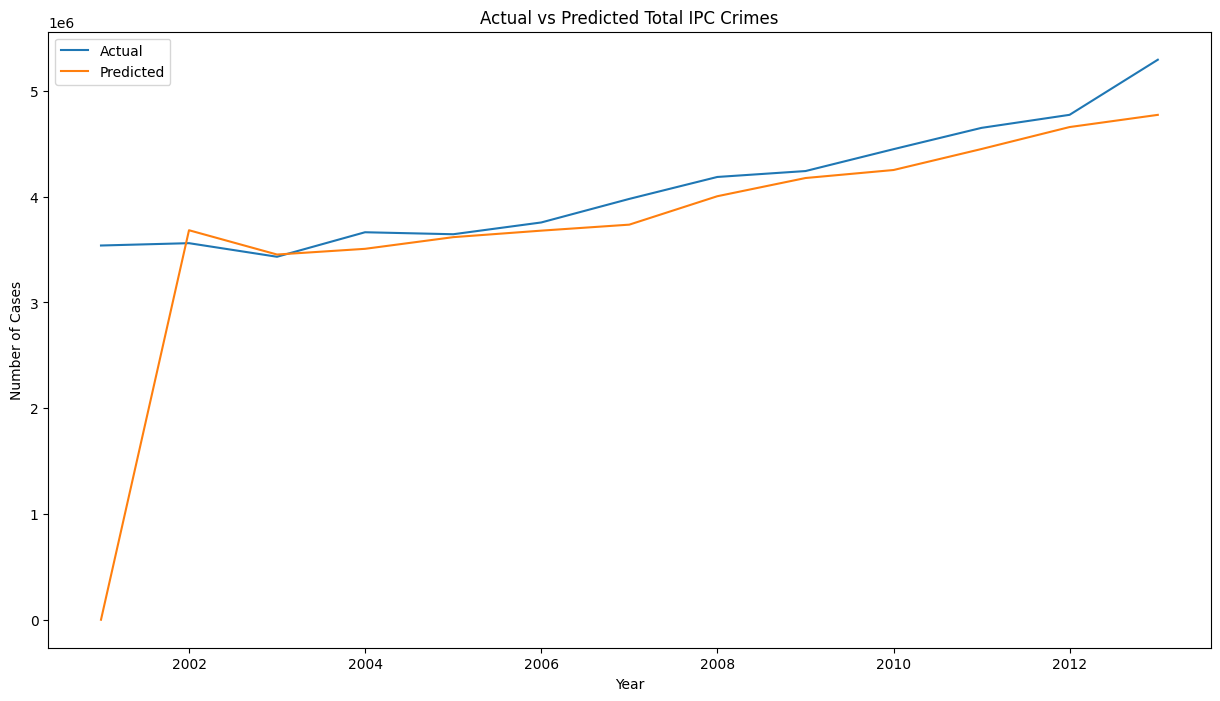

In [477]:
plt.figure(figsize=(15,8))
plt.plot(df.index, df['TOTAL IPC CRIMES'], label='Actual')
plt.plot(df.index, results.predict(start=0, end=len(df)-1), label='Predicted')
plt.title('Actual vs Predicted Total IPC Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

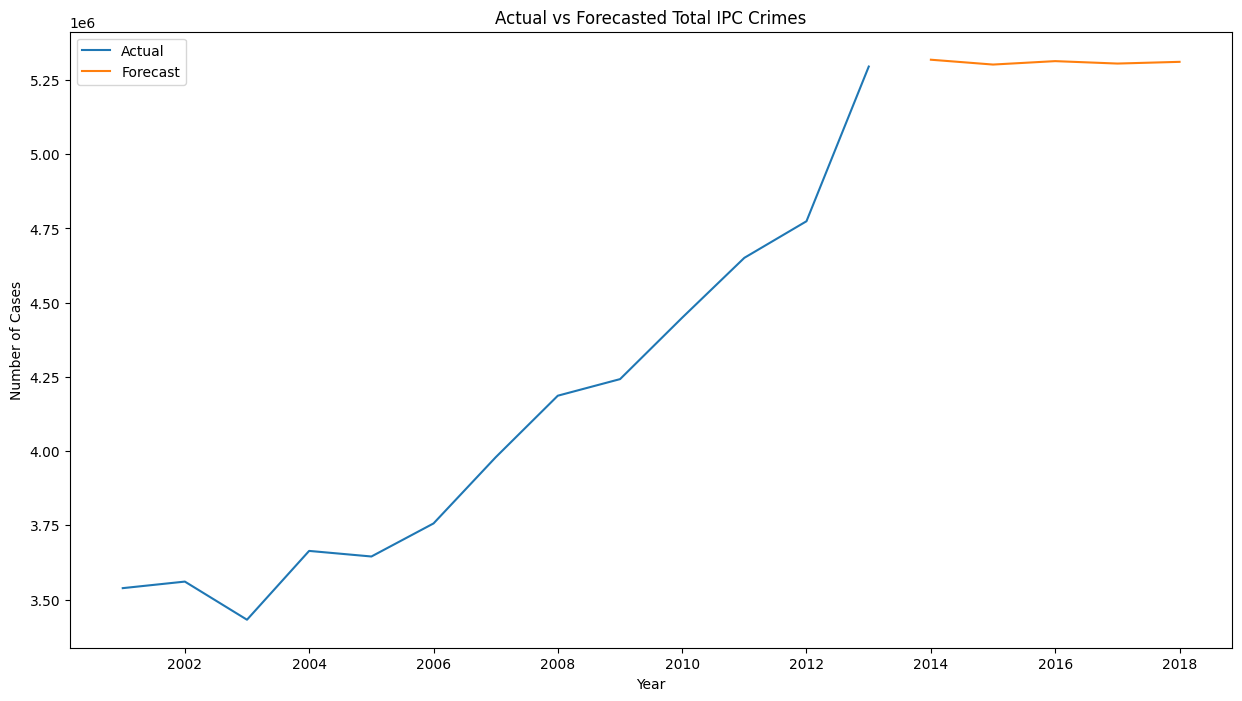

In [478]:
plt.figure(figsize=(15,8))
forecast = results.predict(start=len(df), end=len(df)+4)
plt.plot(df.index, df['TOTAL IPC CRIMES'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Actual vs Forecasted Total IPC Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [479]:
def mae(act,pred):
  error=act-pred
  abs_error=np.absolute(error)
  percent_abs_error=(abs_error/act)*100
  mape_=np.mean(percent_abs_error)
  return mape_

def rmse(s1,s2):
  error=s1-s2
  seerror=error**2
  rmse_=np.sqrt(np.mean(seerror))
  return rmse_

In [480]:
def mae(x,y):
  sum=0
  i=0
  for i in range(0,len(x)):
    sum+=abs(x[i]-y[i])
  return sum/len(x)

In [481]:
print("mean absolute error is ", mae(y_true, y_pred))

mean absolute error is  4185334.641723633


In [482]:
y_true=[y_true[i] for i in range(1,len(y_true)) ]
y_pred=[y_pred[i] for i in range(1,len(y_pred)) ]

In [483]:
print("mean absolute error is ", mae(y_true, y_pred))

mean absolute error is  4261075.776208496


**REGRESSION MODEL**

In [484]:
df2=pd.read_csv("/content/crime (1).csv")
crime=df2

In [485]:
df2.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,andhra pradesh,adilabad,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,andhra pradesh,anantapur,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,andhra pradesh,chittoor,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,andhra pradesh,cuddapah,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,andhra pradesh,cyberabad,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [486]:
df2.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [487]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [488]:
df2.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,2007.161890,88.565854,78.738618,9.754878,55.456098,0.005488,55.450610,85.836992,64.184553,21.652439,...,25.012398,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,3.755581,325.417692,306.650391,58.733349,201.690457,0.111218,201.676202,354.035359,278.536450,93.769371,...,97.601717,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,2.000000,...,2.000000,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,2007.000000,37.000000,28.000000,2.000000,21.000000,0.000000,21.000000,26.000000,19.000000,5.000000,...,8.000000,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,2010.000000,66.000000,57.000000,6.000000,43.000000,0.000000,43.000000,60.000000,46.000000,14.000000,...,19.000000,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,2013.000000,7601.000000,7964.000000,1616.000000,4335.000000,5.000000,4335.000000,11183.000000,9737.000000,2685.000000,...,2830.000000,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [489]:
min_val = crime['TOTAL IPC CRIMES'].min()
max_val = crime['TOTAL IPC CRIMES'].max()
range_val = (max_val - min_val) / 4
low = min_val + range_val
medium = low + range_val
high = medium + range_val


In [490]:
def get_crime_level(crime_count):
    if crime_count <= low:
        return 1
    elif crime_count <= medium:
        return 2
    elif crime_count <= high:
        return 3
    else:
        return 4

crime['CRIME_LEVEL'] = crime['TOTAL IPC CRIMES'].apply(get_crime_level)
crime_level_count = crime['CRIME_LEVEL'].value_counts()



In [491]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

crime["STATE/UT_encoded"] = le.fit_transform(crime["STATE/UT"])

crime["DISTRICT_encoded"] = le.fit_transform(crime["DISTRICT"])
grouped_state = crime[["STATE/UT", "STATE/UT_encoded"]].groupby("STATE/UT").first()
grouped_district = crime[["DISTRICT", "DISTRICT_encoded"]].groupby("DISTRICT").first()


In [492]:
crime.drop(['CRIME_LEVEL','STATE/UT', 'DISTRICT'], axis=1,inplace=True)
df2=crime

In [493]:
df2['TOTAL IPC CRIMES']=df2['TOTAL IPC CRIMES']+df2['OTHER IPC CRIMES']
df2.drop(columns=['OTHER IPC CRIMES'], inplace =True)


In [494]:
for i in df2.columns:
    print(i)
    print("min ", df2[i].min())
    print("max ", df2[i].max())
    print()

YEAR
min  2001
max  2013

MURDER
min  0
max  7601

ATTEMPT TO MURDER
min  0
max  7964

CULPABLE HOMICIDE NOT AMOUNTING TO MURDER
min  0
max  1616

RAPE
min  0
max  4335

CUSTODIAL RAPE
min  0
max  5

OTHER RAPE
min  0
max  4335

KIDNAPPING & ABDUCTION
min  0
max  11183

KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS
min  0
max  9737

KIDNAPPING AND ABDUCTION OF OTHERS
min  0
max  2685

DACOITY
min  0
max  1319

PREPARATION AND ASSEMBLY FOR DACOITY
min  0
max  1263

ROBBERY
min  0
max  9746

BURGLARY
min  0
max  18328

THEFT
min  0
max  53449

AUTO THEFT
min  0
max  24948

OTHER THEFT
min  0
max  35960

RIOTS
min  0
max  11931

CRIMINAL BREACH OF TRUST
min  0
max  4296

CHEATING
min  0
max  22796

COUNTERFIETING
min  0
max  599

ARSON
min  0
max  2830

HURT/GREVIOUS HURT
min  0
max  60488

DOWRY DEATHS
min  0
max  2335

ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY
min  0
max  8252

INSULT TO MODESTY OF WOMEN
min  0
max  4970

CRUELTY BY HUSBAND OR HIS RELATIVES
min  0
max  19865

IM

In [495]:
df2['CUSTODIAL RAPE'].value_counts()

0    9801
1      34
5       3
2       1
3       1
Name: CUSTODIAL RAPE, dtype: int64

********** YEAR ****************


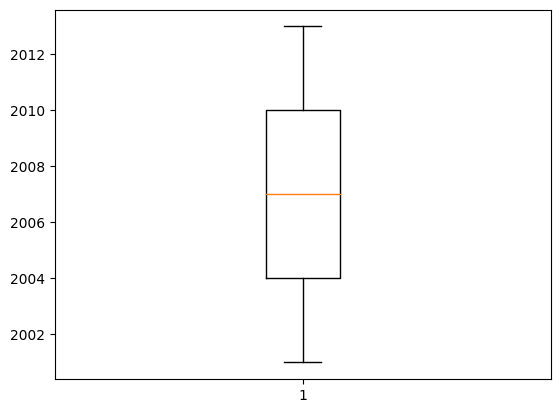

********** MURDER ****************


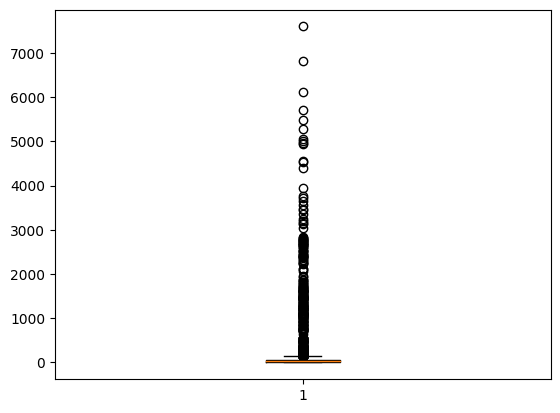

********** ATTEMPT TO MURDER ****************


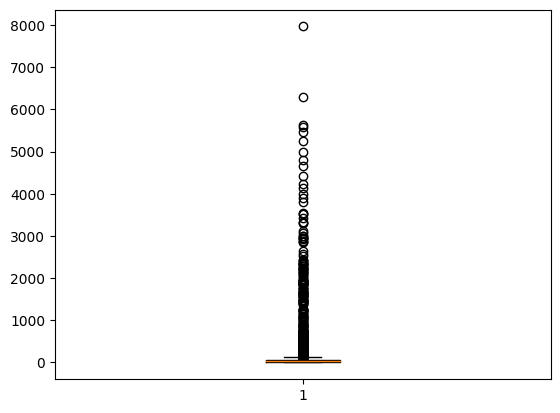

********** CULPABLE HOMICIDE NOT AMOUNTING TO MURDER ****************


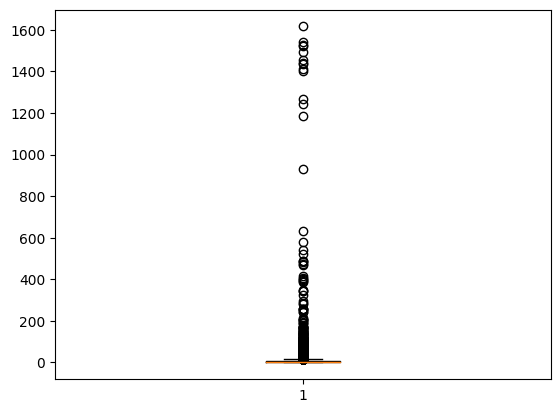

********** RAPE ****************


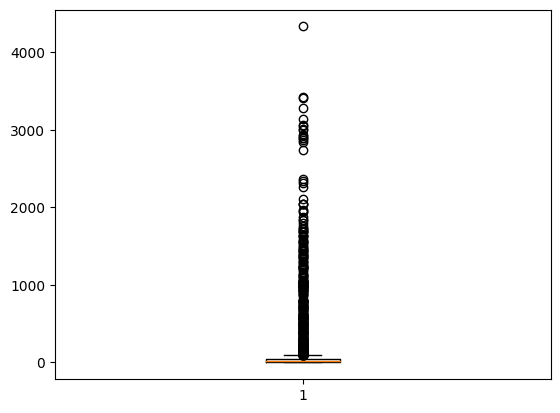

********** CUSTODIAL RAPE ****************


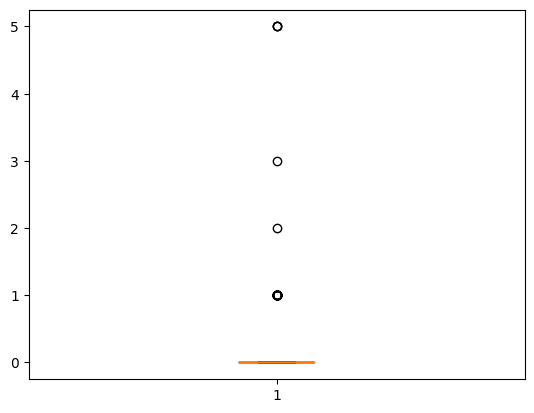

********** OTHER RAPE ****************


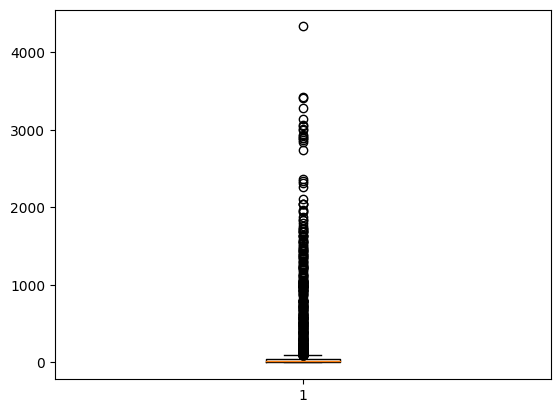

********** KIDNAPPING & ABDUCTION ****************


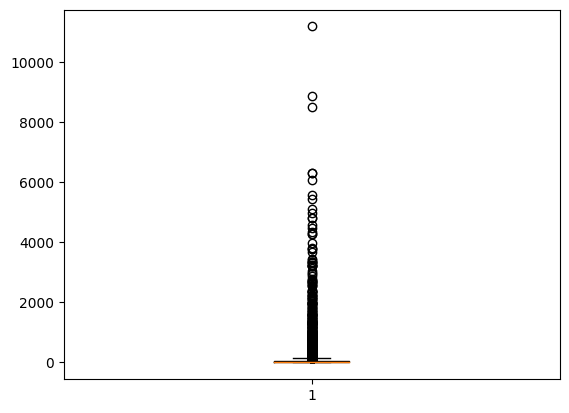

********** KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS ****************


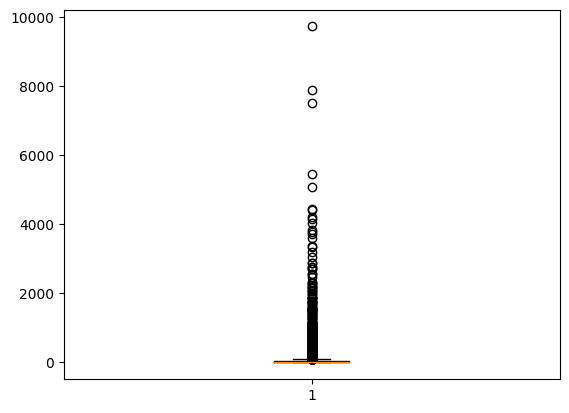

********** KIDNAPPING AND ABDUCTION OF OTHERS ****************


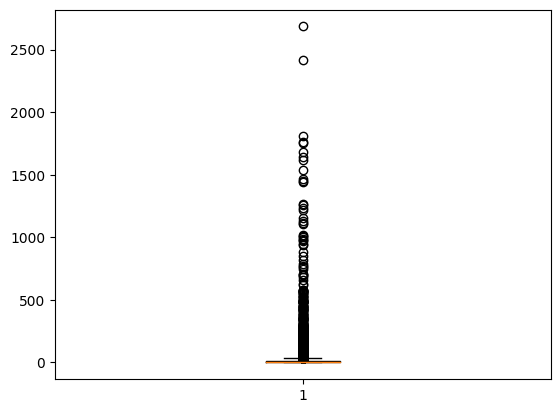

********** DACOITY ****************


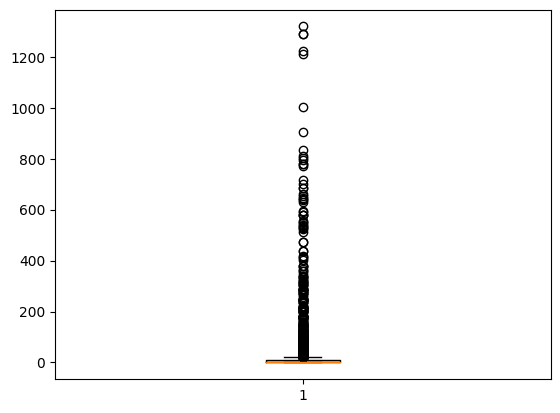

********** PREPARATION AND ASSEMBLY FOR DACOITY ****************


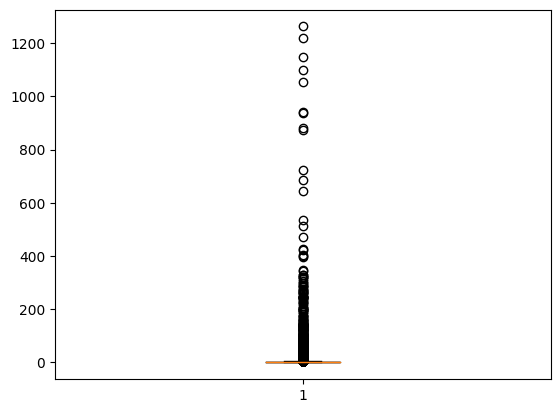

********** ROBBERY ****************


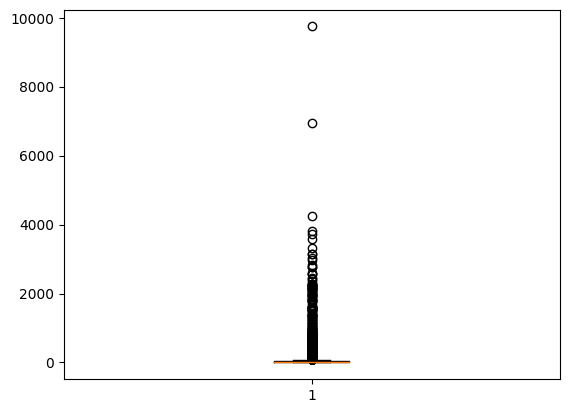

********** BURGLARY ****************


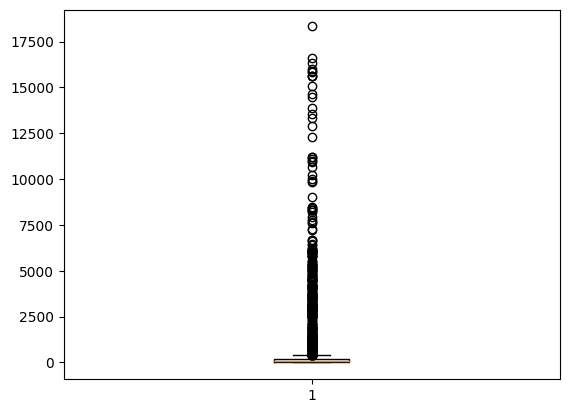

********** THEFT ****************


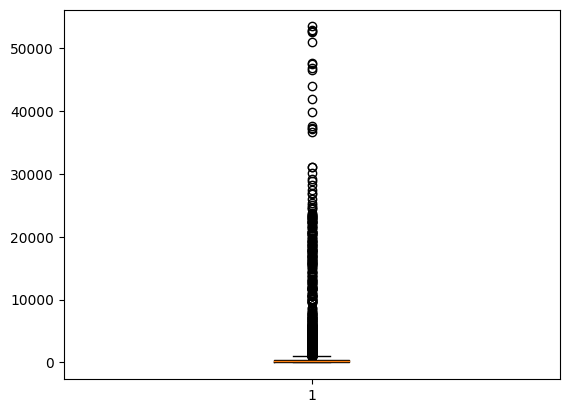

********** AUTO THEFT ****************


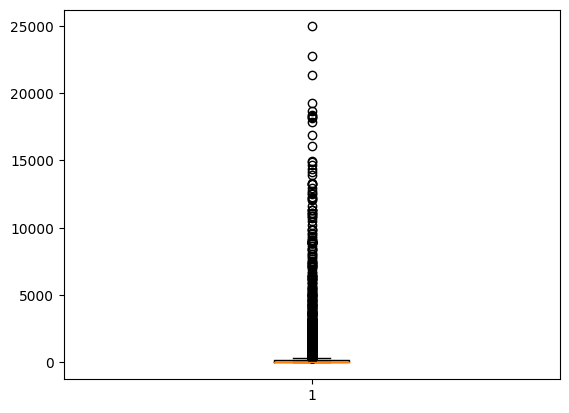

********** OTHER THEFT ****************


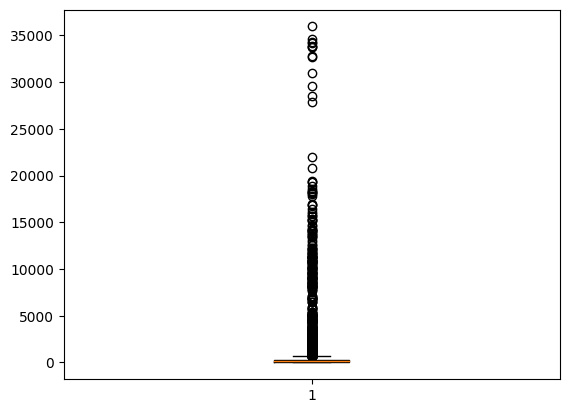

********** RIOTS ****************


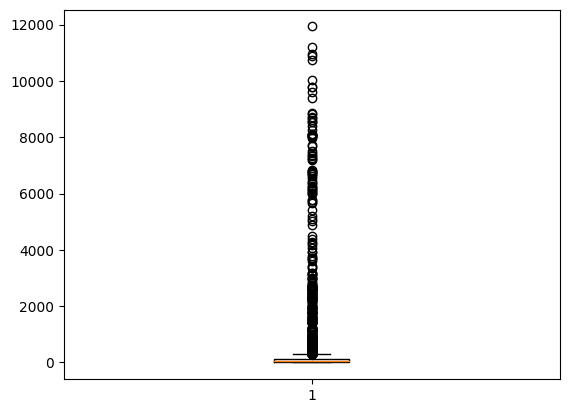

********** CRIMINAL BREACH OF TRUST ****************


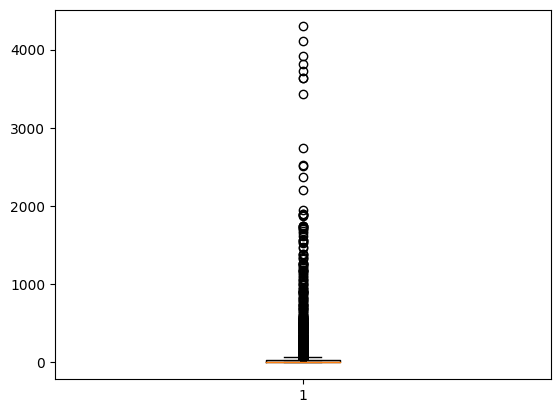

********** CHEATING ****************


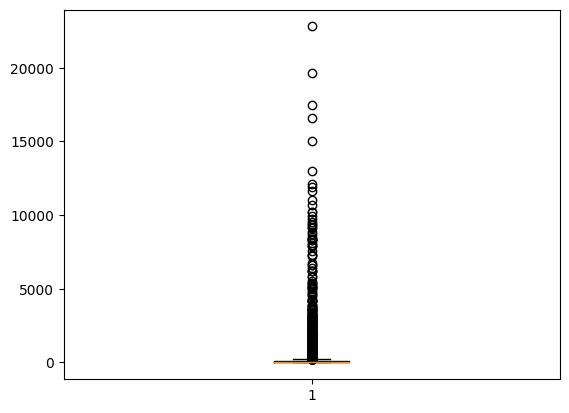

********** COUNTERFIETING ****************


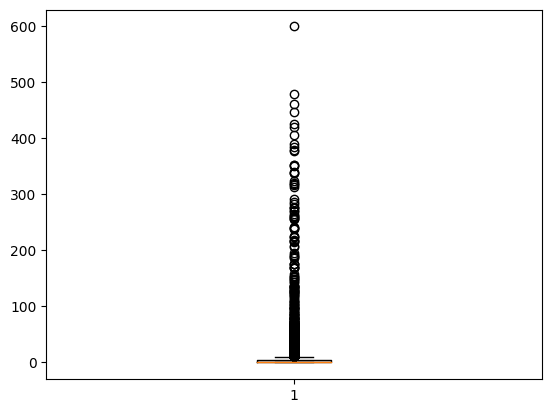

********** ARSON ****************


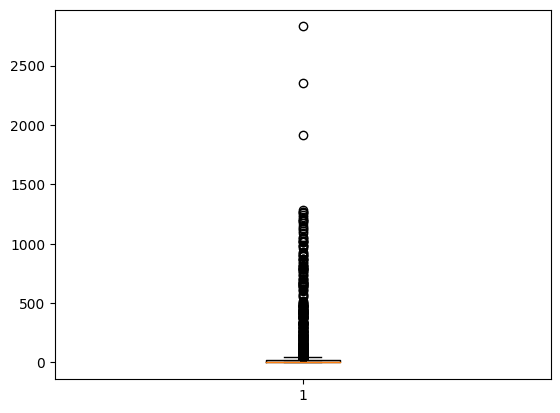

********** HURT/GREVIOUS HURT ****************


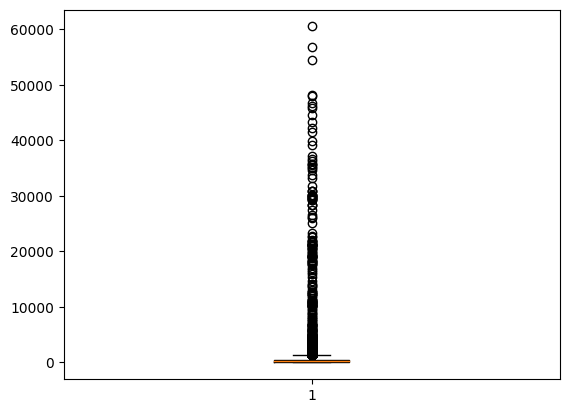

********** DOWRY DEATHS ****************


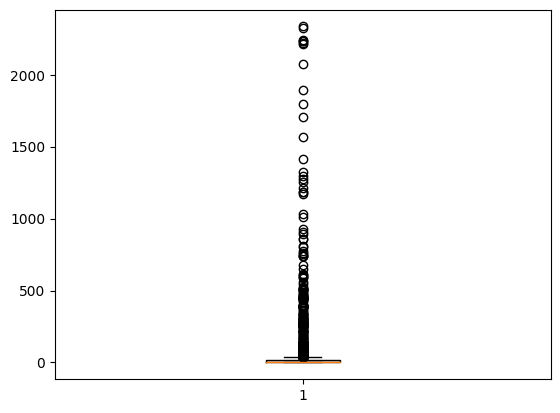

********** ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY ****************


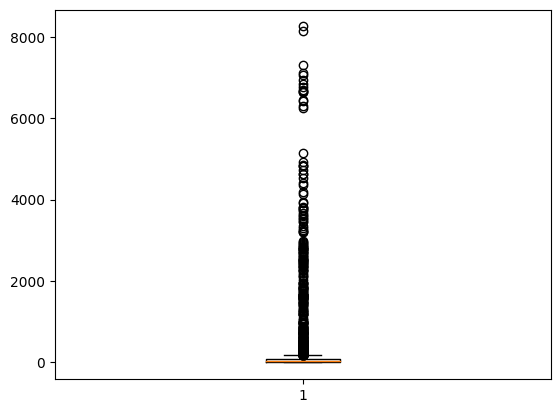

********** INSULT TO MODESTY OF WOMEN ****************


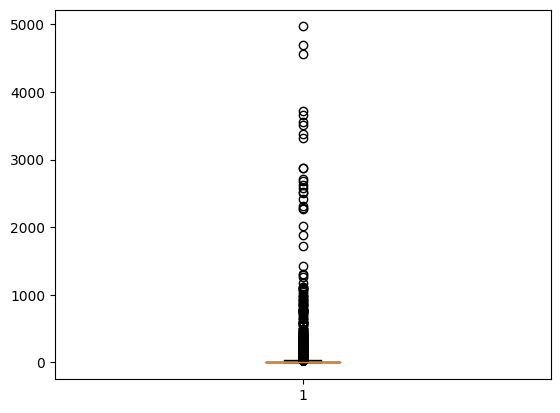

********** CRUELTY BY HUSBAND OR HIS RELATIVES ****************


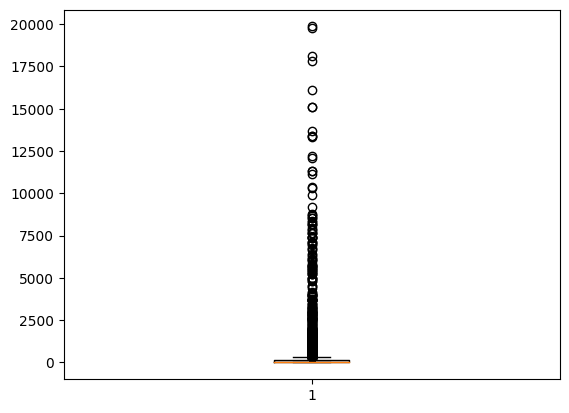

********** IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES ****************


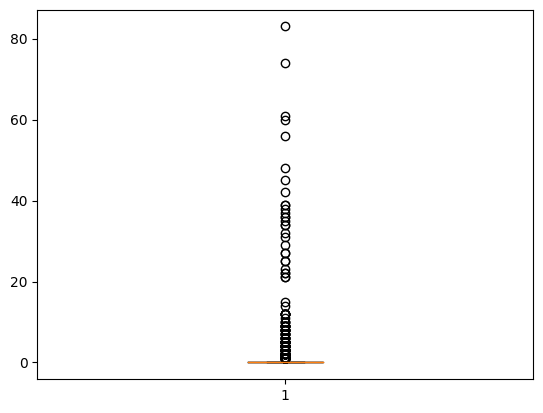

********** CAUSING DEATH BY NEGLIGENCE ****************


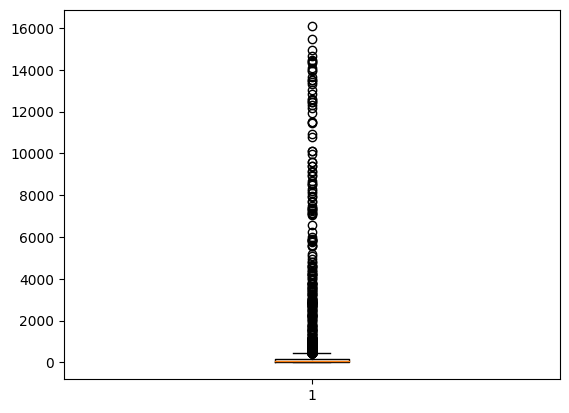

********** TOTAL IPC CRIMES ****************


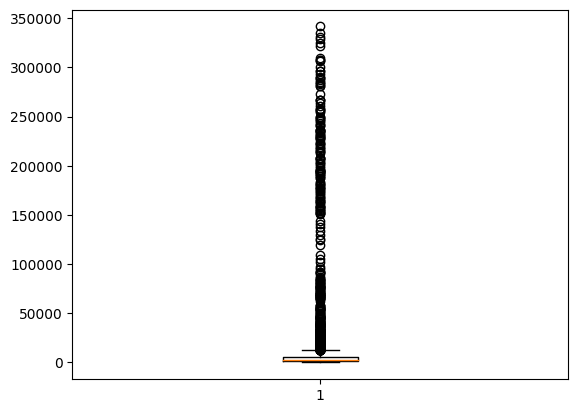

********** STATE/UT_encoded ****************


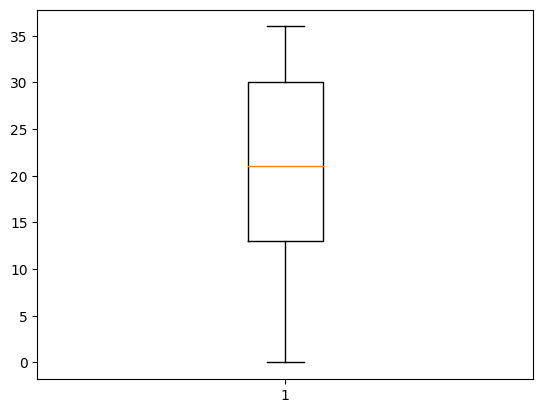

********** DISTRICT_encoded ****************


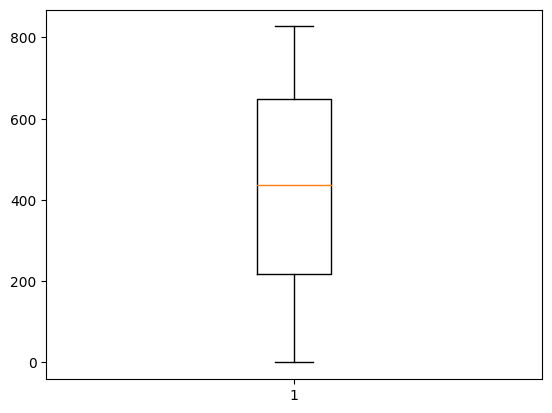

In [496]:
import seaborn as sns
for i in df2.columns:
  print("**********",i,"****************")
  plt.boxplot(df2[i])
  plt.show()

In [497]:
def replace_outliers_with_median(value, lower_bound, upper_bound,i):
    median_value = df2[i].median()
    if value < lower_bound or value > upper_bound:
        return median_value
    else:
        return value


for i in df2.columns:

  Q1 = df2[i].quantile(0.25)
  Q3 = df2[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df2[i] = df2[i].apply(lambda x: replace_outliers_with_median(x, lower_bound, upper_bound,i))

In [ ]:
import seaborn as sns
for i in df2.columns:
  print("**********",i,"****************")
  plt.boxplot(df2[i])
  plt.show()

In [499]:
# df2['MURDER']=df2['MURDER']+df2['ATTEMPT TO MURDER']+df2['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']
# df2['RAPE']=df2['RAPE']+df2['CUSTODIAL RAPE']+df2['OTHER RAPE']
# df2['KIDNAPPING & ABDUCTION']=df2['KIDNAPPING & ABDUCTION']+df2['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']+df2['KIDNAPPING AND ABDUCTION OF OTHERS']
# df2['THEFT']=df2['THEFT']+df2['ROBBERY']+df2['BURGLARY']+df2['AUTO THEFT']+df2['OTHER THEFT']
# df2['CRIME ON WOMEN']=df2['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']+df2['DOWRY DEATHS']+df2['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+df2['INSULT TO MODESTY OF WOMEN']+df2['CRUELTY BY HUSBAND OR HIS RELATIVES']
# df2.drop(columns=['ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','ROBBERY','BURGLARY','AUTO THEFT','OTHER THEFT','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','AUTO THEFT','CRUELTY BY HUSBAND OR HIS RELATIVES'], inplace=True)
# df2['DACOITY']=df2['DACOITY']+df2['PREPARATION AND ASSEMBLY FOR DACOITY']
# df2.drop(columns=['YEAR'], inplace=True)

# df2.columns

In [ ]:
sns.pairplot(df2)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(df2.corr(), annot=True)



In [ ]:
l=df2.corr()
for i in df2.columns:
  if i=='TOTAL IPC CRIMES':
    continue
  else:
    if l[i]['TOTAL IPC CRIMES']  >0.80:
      print(i)
      print(l[i]['TOTAL IPC CRIMES'])

In [ ]:
X = crime.drop(['TOTAL IPC CRIMES'], axis=1)
y = crime['TOTAL IPC CRIMES']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
y_pred_train = model.predict(X_train)

r21 = r2_score(y_train, y_pred_train)
print("linear regression r2 score: traning", r21)

print("linear regression r2 score: testing", r2)


# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_pred_train=dt_regressor.predict(X_train)
dt_pred = dt_regressor.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_r1 = r2_score(y_train, dt_pred_train)
print("Decision Tree Regression R2 Score:", dt_r2)
print("Decision Tree Regression R2 Score: trainig", dt_r1)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_pred_train=rf_regressor.predict(X_train)

rf_pred = rf_regressor.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
r22 = r2_score(y_train, rf_pred_train)
print("Random Forest Regression R2 Score:", rf_r2)
print("random Tree Regression R2 Score: trainig", r22)

# Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
gb_pred_t = gb_regressor.predict(X_train)
gb_r2 = r2_score(y_test, gb_pred)
gb_r21 = r2_score(y_train, gb_pred_t)
print("Gradient Boosting Regression R2 Score:", gb_r2)
print("Gradient Boosting Regression R2 Score: training", gb_r21)





